In [2]:
import pandas as pd
import plotly.express as px

In [3]:
df = pd.read_csv("RECLAMEAQUI_NAGEM.csv") 

In [4]:
df.head(5)

,ID,TEMA,LOCAL,TEMPO,CATEGORIA,STATUS,DESCRICAO,URL,ANO,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,DIA_DA_SEMANA,TRIMETRES,CASOS
0,27859289,Seguro Nagem celular é uma [Editado pelo Recla...,Fortaleza - CE,2017-01-08,Nagem - Loja Física<->Problemas com o Atendimento,Não resolvido,Comprei um celular LG na loja NAGEM do shoppin...,https://www.reclameaqui.com.br//nagem-loja-fis...,2017,1,8,8,1,6,1,1
1,28562465,Demora na finalização da venda / Mau atendimento,Recife - PE,2017-01-09,Nagem - Loja Física,Resolvido,"Fui na loja Nagem do Shopping Recife, fiz uma ...",https://www.reclameaqui.com.br//nagem-loja-fis...,2017,1,9,9,2,0,1,1
2,29249337,Problemas com a troca de produto,Salvador - BA,2017-01-10,Nagem - Loja Física,Respondida,Comprei um celular da Samsung J5 prime no sába...,https://www.reclameaqui.com.br//nagem-loja-fis...,2017,1,10,10,2,1,1,1
3,29999183,Produto com defeito/desrespeito com o consumidor,Olinda - PE,2017-01-11,Nagem - Loja Física,Respondida,No dia 25 /10 /2017 realizei uma compra de um ...,https://www.reclameaqui.com.br//nagem-loja-fis...,2017,1,11,11,2,2,1,1
4,30812099,Descaso Comsumidor,Salvador - BA,2017-01-12,TV<->Blackfriday<->Tela trincada<->Eletroeletr...,Não resolvido,"Na sexta feira do dia 24/11/2017,fui efetuar u...",https://www.reclameaqui.com.br//nagem-loja-fis...,2017,1,12,12,2,3,1,1


In [6]:
df['TEMPO'] = pd.to_datetime(df['TEMPO'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             1000 non-null   int64         
 1   TEMA           1000 non-null   object        
 2   LOCAL          1000 non-null   object        
 3   TEMPO          1000 non-null   datetime64[ns]
 4   CATEGORIA      1000 non-null   object        
 5   STATUS         1000 non-null   object        
 6   DESCRICAO      1000 non-null   object        
 7   URL            1000 non-null   object        
 8   ANO            1000 non-null   int64         
 9   MES            1000 non-null   int64         
 10  DIA            1000 non-null   int64         
 11  DIA_DO_ANO     1000 non-null   int64         
 12  SEMANA_DO_ANO  1000 non-null   int64         
 13  DIA_DA_SEMANA  1000 non-null   int64         
 14  TRIMETRES      1000 non-null   int64         
 15  CASOS          1000 no

In [8]:
df['TEMPO']

0     2017-01-08
1     2017-01-09
2     2017-01-10
3     2017-01-11
4     2017-01-12
         ...    
995   2022-11-01
996   2022-11-08
997   2022-12-02
998   2022-12-07
999   2022-12-08
Name: TEMPO, Length: 1000, dtype: datetime64[ns]

<Axes: xlabel='TEMPO'>

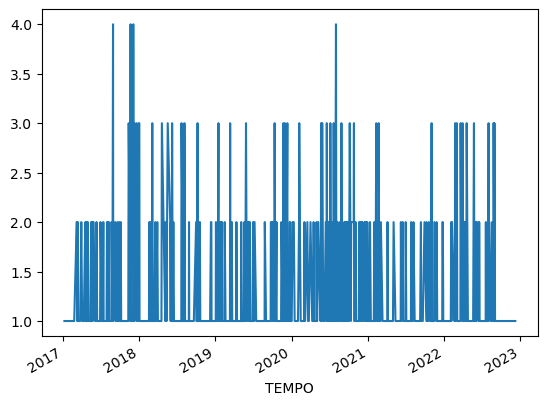

In [9]:
df.groupby('TEMPO').nunique()['ID'].plot()

In [12]:
df['STATUS'].value_counts()

STATUS
Respondida        440
Resolvido         238
Em réplica        174
Não resolvido     147
Não respondida      1
Name: count, dtype: int64

In [13]:
freq_nagem = df['STATUS'].value_counts().reset_index()
freq_nagem.columns = ['STATUS','Frequencia']

In [14]:
freq_nagem

,STATUS,Frequencia
0,Respondida,440
1,Resolvido,238
2,Em réplica,174
3,Não resolvido,147
4,Não respondida,1


In [15]:
px.bar(freq_nagem, x='STATUS', y='Frequencia', title='Frequência dos Status', labels={'Frequencia': 'Contagem'})

In [16]:
df['LOCAL'].iloc[0]

'Fortaleza - CE'

In [18]:
df['LOCAL'].iloc[0].split('-')[1].strip()

'CE'

In [19]:
estado_lista = []
for i in range(len(df)):
    estado_lista.append(df['LOCAL'].iloc[i].split('-',2)[1].strip())

In [ ]:
estado_lista

In [21]:
df['ESTADO'] = estado_lista

In [22]:
df.head()

,ID,TEMA,LOCAL,TEMPO,CATEGORIA,STATUS,DESCRICAO,URL,ANO,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,DIA_DA_SEMANA,TRIMETRES,CASOS,ESTADO
0,27859289,Seguro Nagem celular é uma [Editado pelo Recla...,Fortaleza - CE,2017-01-08,Nagem - Loja Física<->Problemas com o Atendimento,Não resolvido,Comprei um celular LG na loja NAGEM do shoppin...,https://www.reclameaqui.com.br//nagem-loja-fis...,2017,1,8,8,1,6,1,1,CE
1,28562465,Demora na finalização da venda / Mau atendimento,Recife - PE,2017-01-09,Nagem - Loja Física,Resolvido,"Fui na loja Nagem do Shopping Recife, fiz uma ...",https://www.reclameaqui.com.br//nagem-loja-fis...,2017,1,9,9,2,0,1,1,PE
2,29249337,Problemas com a troca de produto,Salvador - BA,2017-01-10,Nagem - Loja Física,Respondida,Comprei um celular da Samsung J5 prime no sába...,https://www.reclameaqui.com.br//nagem-loja-fis...,2017,1,10,10,2,1,1,1,BA
3,29999183,Produto com defeito/desrespeito com o consumidor,Olinda - PE,2017-01-11,Nagem - Loja Física,Respondida,No dia 25 /10 /2017 realizei uma compra de um ...,https://www.reclameaqui.com.br//nagem-loja-fis...,2017,1,11,11,2,2,1,1,PE
4,30812099,Descaso Comsumidor,Salvador - BA,2017-01-12,TV<->Blackfriday<->Tela trincada<->Eletroeletr...,Não resolvido,"Na sexta feira do dia 24/11/2017,fui efetuar u...",https://www.reclameaqui.com.br//nagem-loja-fis...,2017,1,12,12,2,3,1,1,BA


In [23]:
df['ESTADO'].unique()

array(['CE', 'PE', 'BA', 'RN', 'SE', 'SP', 'PB', 'MG', 'RJ', 'MA', 'PA',
       'SC', 'PI', 'naoconsta', 'AL', 'AM', 'RR', 'DF', 'AP', ''],
      dtype=object)

In [24]:
df['ESTADO'].value_counts()

ESTADO
PE           393
CE           179
BA           156
SE            54
PB            44
PA            39
RN            31
SP            28
MA            27
PI            15
AL            14
RJ             6
MG             4
DF             4
SC             1
naoconsta      1
AM             1
RR             1
AP             1
               1
Name: count, dtype: int64

In [26]:
correcao_estados = {
    'naoconsta': 'Não Consta',
    '': 'Não Consta'
}

In [27]:
df['ESTADO'] = df['ESTADO'].replace(correcao_estados)

In [28]:
df['ESTADO'].unique()

array(['CE', 'PE', 'BA', 'RN', 'SE', 'SP', 'PB', 'MG', 'RJ', 'MA', 'PA',
       'SC', 'PI', 'Não Consta', 'AL', 'AM', 'RR', 'DF', 'AP'],
      dtype=object)

In [29]:
df['ESTADO'].value_counts()

ESTADO
PE            393
CE            179
BA            156
SE             54
PB             44
PA             39
RN             31
SP             28
MA             27
PI             15
AL             14
RJ              6
MG              4
DF              4
Não Consta      2
SC              1
AM              1
RR              1
AP              1
Name: count, dtype: int64

In [30]:
def count_palavras(texto):
    return len(texto.split())

<Axes: ylabel='Density'>

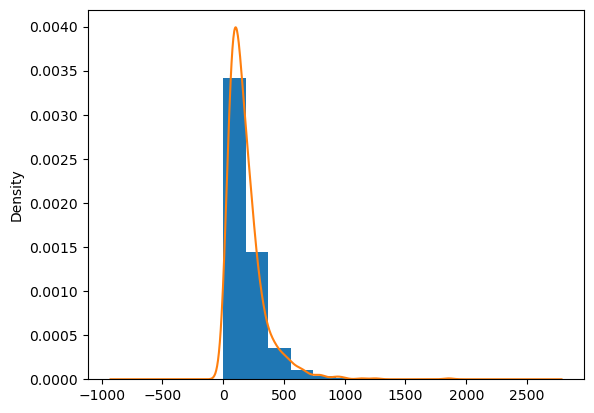

In [31]:
df['DESCRICAO'].apply(count_palavras).plot(kind='hist',density=True)
df['DESCRICAO'].apply(count_palavras).plot.kde()